In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

train_data = pd.read_csv('C:/Users/A208818/Downloads/Customer-classification/existing_base_train.csv')
test_data = pd.read_csv('C:/Users/A208818/Downloads/Customer-classification/existing_base_test.csv')

In [170]:
print(train_data.info())
print(' ')
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   object 
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

In [215]:
train_data.head()
test_data.head()

REF_NO children age_band   status occupation occupation_partner  \
0     697     Zero      71+  Partner    Retired          Housewife   
1    7897     Zero    31-35  Partner    Unknown   Business Manager   
2    4729     Zero      71+  Partner  Housewife            Retired   
3    6914        1    22-25  Partner      Other              Other   
4    2795     Zero    65-70  Widowed    Retired            Unknown   

  home_status      family_income self_employed self_employed_partner  ...  \
0    Own Home  <12,500, >=10,000            No                    No  ...   
1    Own Home           >=35,000            No                    No  ...   
2    Own Home  <15,000, >=12,500            No                    No  ...   
3    Own Home  <17,500, >=15,000            No                    No  ...   
4    Own Home            < 4,000            No                    No  ...   

   Investment_in_Mutual_Fund Investment_Tax_Saving_Bond Home_Loan  \
0                      45.97                       0.00      0.00   
1                     133.88                      27.45     13.47   
2                     107.88                       0.00      0.00   
3                      44.96                       0.00      0.00   
4                      33.96                       6.99     17.93   

  Online_Purchase_Amount  gender      region  Investment_in_Commudity  \
0                   0.00    Male  South West                    40.48   
1                  57.46    Male  South East                    27.07   
2                   0.00  Female  South West                    44.39   
3                   0.00  Female    Scotland                    21.59   
4                   5.45  Female  South East                    53.66   

   Investment_in_Equity  Investment_in_Derivative  Portfolio_Balance  
0                 15.07                     28.40              83.05  
1                 72.01                     82.74             235.29  
2                 32.62                     43.86              98.38  
3                 24.57                     29.23              86.32  
4                 16.22                     32.89             102.99  

[5 rows x 31 columns]

In [235]:
# print(train_data.isna().sum())  
print(train_data.isnull().sum())
print(' ')
# print(test_data.isna().sum())
print(test_data.isnull().sum())

REF_NO                             0
children                           0
age_band                           0
status                             0
occupation                         0
occupation_partner                 0
home_status                        0
family_income                      0
self_employed                      0
self_employed_partner              0
year_last_moved                    0
TVarea                             0
post_code                          0
post_area                          0
Average_Credit_Card_Transaction    0
Balance_Transfer                   0
Term_Deposit                       0
Life_Insurance                     0
Medical_Insurance                  0
Average_A/C_Balance                0
Personal_Loan                      0
Investment_in_Mutual_Fund          0
Investment_Tax_Saving_Bond         0
Home_Loan                          0
Online_Purchase_Amount             0
gender                             0
region                             0
I

In [173]:
train_data.describe()
test_data.describe()

REF_NO  year_last_moved  Average_Credit_Card_Transaction  \
count   2031.000000      2031.000000                      2031.000000   
mean    5664.780896      1970.374200                        24.204407   
std     3332.892962       170.457726                        49.760499   
min        1.000000         0.000000                         0.000000   
25%     2816.500000      1979.000000                         0.000000   
50%     5575.000000      1988.000000                         0.000000   
75%     8572.500000      1994.000000                        24.490000   
max    11516.000000      1999.000000                       390.880000   

       Balance_Transfer  Term_Deposit  Life_Insurance  Medical_Insurance  \
count        2031.00000   2031.000000     2031.000000        2031.000000   
mean           47.75711     28.760660       69.938897          20.405470   
std            76.00507     53.219266       94.604936          34.094857   
min             0.00000      0.000000        0.000000           0.000000   
25%             0.00000      0.000000        0.000000           0.000000   
50%            19.47000      0.000000       34.490000           4.490000   
75%            69.71000     35.970000      100.680000          29.470000   
max           858.78000    531.800000      825.020000         296.010000   

       Average_A/C_Balance  Personal_Loan  Investment_in_Mutual_Fund  \
count          2031.000000    2031.000000                2031.000000   
mean             33.072733      28.366696                  44.803978   
std              46.421372      80.744969                  61.741147   
min               0.000000       0.000000                   0.000000   
25%               0.000000       0.000000                   0.000000   
50%              17.970000       0.000000                  23.980000   
75%              48.950000      24.875000                  63.930000   
max             616.170000    1645.380000                 561.540000   

       Investment_Tax_Saving_Bond    Home_Loan  Online_Purchase_Amount  \
count                 2031.000000  2031.000000             2031.000000   
mean                     6.331369     4.742354               19.019227   
std                     13.456798    10.127166               78.066618   
min                      0.000000     0.000000                0.000000   
25%                      0.000000     0.000000                0.000000   
50%                      0.000000     0.000000                0.000000   
75%                      5.990000     4.990000                8.985000   
max                    123.340000   122.670000             1407.450000   

       Investment_in_Commudity  Investment_in_Equity  \
count              2031.000000           2031.000000   
mean                 38.213437             22.723570   
std                  41.412048             30.364114   
min                   0.000000              0.000000   
25%                   8.195000              4.830000   
50%                  25.590000             13.470000   
75%                  54.215000             29.895000   
max                 348.970000            434.150000   

       Investment_in_Derivative  Portfolio_Balance  
count               2031.000000        2031.000000  
mean                  33.820625          94.887715  
std                   37.525384         102.915537  
min                    0.000000         -74.070000  
25%                    8.830000          28.330000  
50%                   22.560000          68.530000  
75%                   46.210000         131.345000  
max                  533.980000        1109.570000

In [174]:
print(train_data.skew())
print(test_data.skew())

REF_NO                             -0.012803
year_last_moved                   -10.639671
Average_Credit_Card_Transaction     3.761152
Balance_Transfer                    8.173734
Term_Deposit                        4.174163
Life_Insurance                      5.509379
Medical_Insurance                   3.361940
Average_A/C_Balance                 2.689985
Personal_Loan                      26.159596
Investment_in_Mutual_Fund           9.667247
Investment_Tax_Saving_Bond          3.191713
Home_Loan                           3.977657
Online_Purchase_Amount             21.763954
Investment_in_Commudity             4.816122
Investment_in_Equity               11.524906
Investment_in_Derivative           12.462312
Portfolio_Balance                   8.895472
Revenue_Grid                       -2.562680
dtype: float64
REF_NO                              0.023930
year_last_moved                   -11.422799
Average_Credit_Card_Transaction     3.009489
Balance_Transfer                    2.86

In [2]:
#lowercase all column names#
train_data.columns = train_data.columns.str.lower()        
test_data.columns = test_data.columns.str.lower()

In [3]:
#cleaning the childern column#
def child(data):
    print(data['children'].dtype)
    print(data['children'].value_counts())
    
child(train_data)
child(test_data)

object
Zero    4991
1       1474
2       1271
3        375
4+        13
Name: children, dtype: int64
object
Zero    1217
1        374
2        336
3         98
4+         6
Name: children, dtype: int64


In [4]:
def child(data):
    # train_data['children33']=train_data['children'].replace("Zero","0").replace("4+","4").astype(int)
    # train_data.loc[train_data['children'] == "4+", 'children'] = "4"
    # train_data.loc[train_data['children'] == "Zero", 'children'] = "0"
    data['children']=data['children'].replace({"Zero": "0","4+": "4"}).astype(int)
    return data
    
train_data=child(train_data)
test_data=child(test_data)

In [5]:
def child(data):
    print(data['children'].dtype)
    print(data['children'].value_counts())
    
child(train_data)
child(test_data)

int32
0    4991
1    1474
2    1271
3     375
4      13
Name: children, dtype: int64
int32
0    1217
1     374
2     336
3      98
4       6
Name: children, dtype: int64


In [6]:
#cleaning the age_band column#
def age(data):
    print(data['age_band'].dtype)
    print(data['age_band'].value_counts())
    
age(train_data)
age(test_data)

object
45-50      1098
41-45       903
36-40       895
55-60       865
31-35       840
51-55       833
26-30       735
61-65       700
65-70       468
22-25       356
71+         337
18-21        50
Unknown      44
Name: age_band, dtype: int64
object
45-50      261
36-40      239
31-35      221
51-55      219
41-45      209
26-30      192
55-60      182
61-65      181
65-70      130
22-25      100
71+         73
18-21       13
Unknown     11
Name: age_band, dtype: int64


In [7]:
def age(data):
    data['age_band1'] = data['age_band'].str.replace("-", " ").str.replace("+", " ")
    data['age_band2'] = data['age_band1'].str.split().str.get(0)
    data['age_band'] = data['age_band2'].replace("Unknown",data['age_band2'].mode().values[0]).astype(int) 
    return data

train_data=age(train_data)
test_data=age(test_data)

In [8]:
def age(data):
    print(data['age_band'].dtype)
    print(data['age_band'].value_counts())
    
age(train_data)
age(test_data)

int32
45    1142
41     903
36     895
55     865
31     840
51     833
26     735
61     700
65     468
22     356
71     337
18      50
Name: age_band, dtype: int64
int32
45    272
36    239
31    221
51    219
41    209
26    192
55    182
61    181
65    130
22    100
71     73
18     13
Name: age_band, dtype: int64


In [9]:
#cleaning the age_band column#
def fam(data):
    print(data['family_income'].dtype)
    print(data['family_income'].value_counts())
    
fam(train_data)
fam(test_data)

object
>=35,000             2014
<27,500, >=25,000     969
<30,000, >=27,500     796
<25,000, >=22,500     656
<12,500, >=10,000     535
<20,000, >=17,500     525
<17,500, >=15,000     521
<15,000, >=12,500     508
<22,500, >=20,000     479
<10,000, >= 8,000     452
< 8,000, >= 4,000     328
< 4,000               233
Unknown               108
Name: family_income, dtype: int64
object
>=35,000             503
<27,500, >=25,000    258
<30,000, >=27,500    198
<25,000, >=22,500    177
<20,000, >=17,500    158
<12,500, >=10,000    142
<15,000, >=12,500    121
<17,500, >=15,000    113
<22,500, >=20,000    111
<10,000, >= 8,000    111
< 8,000, >= 4,000     74
< 4,000               45
Unknown               20
Name: family_income, dtype: int64


In [10]:
def fam(data):
    import re
    data['family_income1'] = data['family_income'].str.replace(',','')
    data['family_income2'] = data['family_income1'].str.replace(' ','')
    data['family_income3'] = data['family_income2'].replace("Unknown",data['family_income2'].mode().values[0])
    data['family_income4'] = data['family_income3'].str.replace(r'[^0-9]',' ', regex=True).str.strip()
    data['family_income'] = data['family_income4'].str.split(' ').str.get(0).astype(int)
    return data

train_data=fam(train_data)
test_data=fam(test_data)

In [258]:
print(train_data['family_income'].dtype)
print(train_data['family_income'].value_counts())

int32
35000    2122
27500     969
30000     796
25000     656
12500     535
20000     525
17500     521
15000     508
22500     479
10000     452
8000      328
4000      233
Name: family_income, dtype: int64


In [142]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ref_no                           8124 non-null   int64  
 1   children                         8124 non-null   int32  
 2   age_band                         8124 non-null   int32  
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   int32  
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  tvarea                           8124 non-null   object 
 12  post_code           

In [12]:
#dropping all derived columns and unnecessory features#
def dropcol(data):
    data=data.drop(columns=['ref_no', 'post_code' ,'family_income1','family_income2','family_income3','family_income4','age_band1','age_band2'],axis=1)
    return data

train_data=dropcol(train_data)
test_data=dropcol(test_data)

KeyError: "['ref_no', 'post_code', 'family_income1', 'family_income2', 'family_income3', 'family_income4', 'age_band1', 'age_band2'] not found in axis"

In [144]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   children                         8124 non-null   int32  
 1   age_band                         8124 non-null   int32  
 2   status                           8124 non-null   object 
 3   occupation                       8124 non-null   object 
 4   occupation_partner               8124 non-null   object 
 5   home_status                      8124 non-null   object 
 6   family_income                    8124 non-null   int32  
 7   self_employed                    8124 non-null   object 
 8   self_employed_partner            8124 non-null   object 
 9   year_last_moved                  8124 non-null   int64  
 10  tvarea                           8124 non-null   object 
 11  post_area                        8124 non-null   object 
 12  average_credit_card_

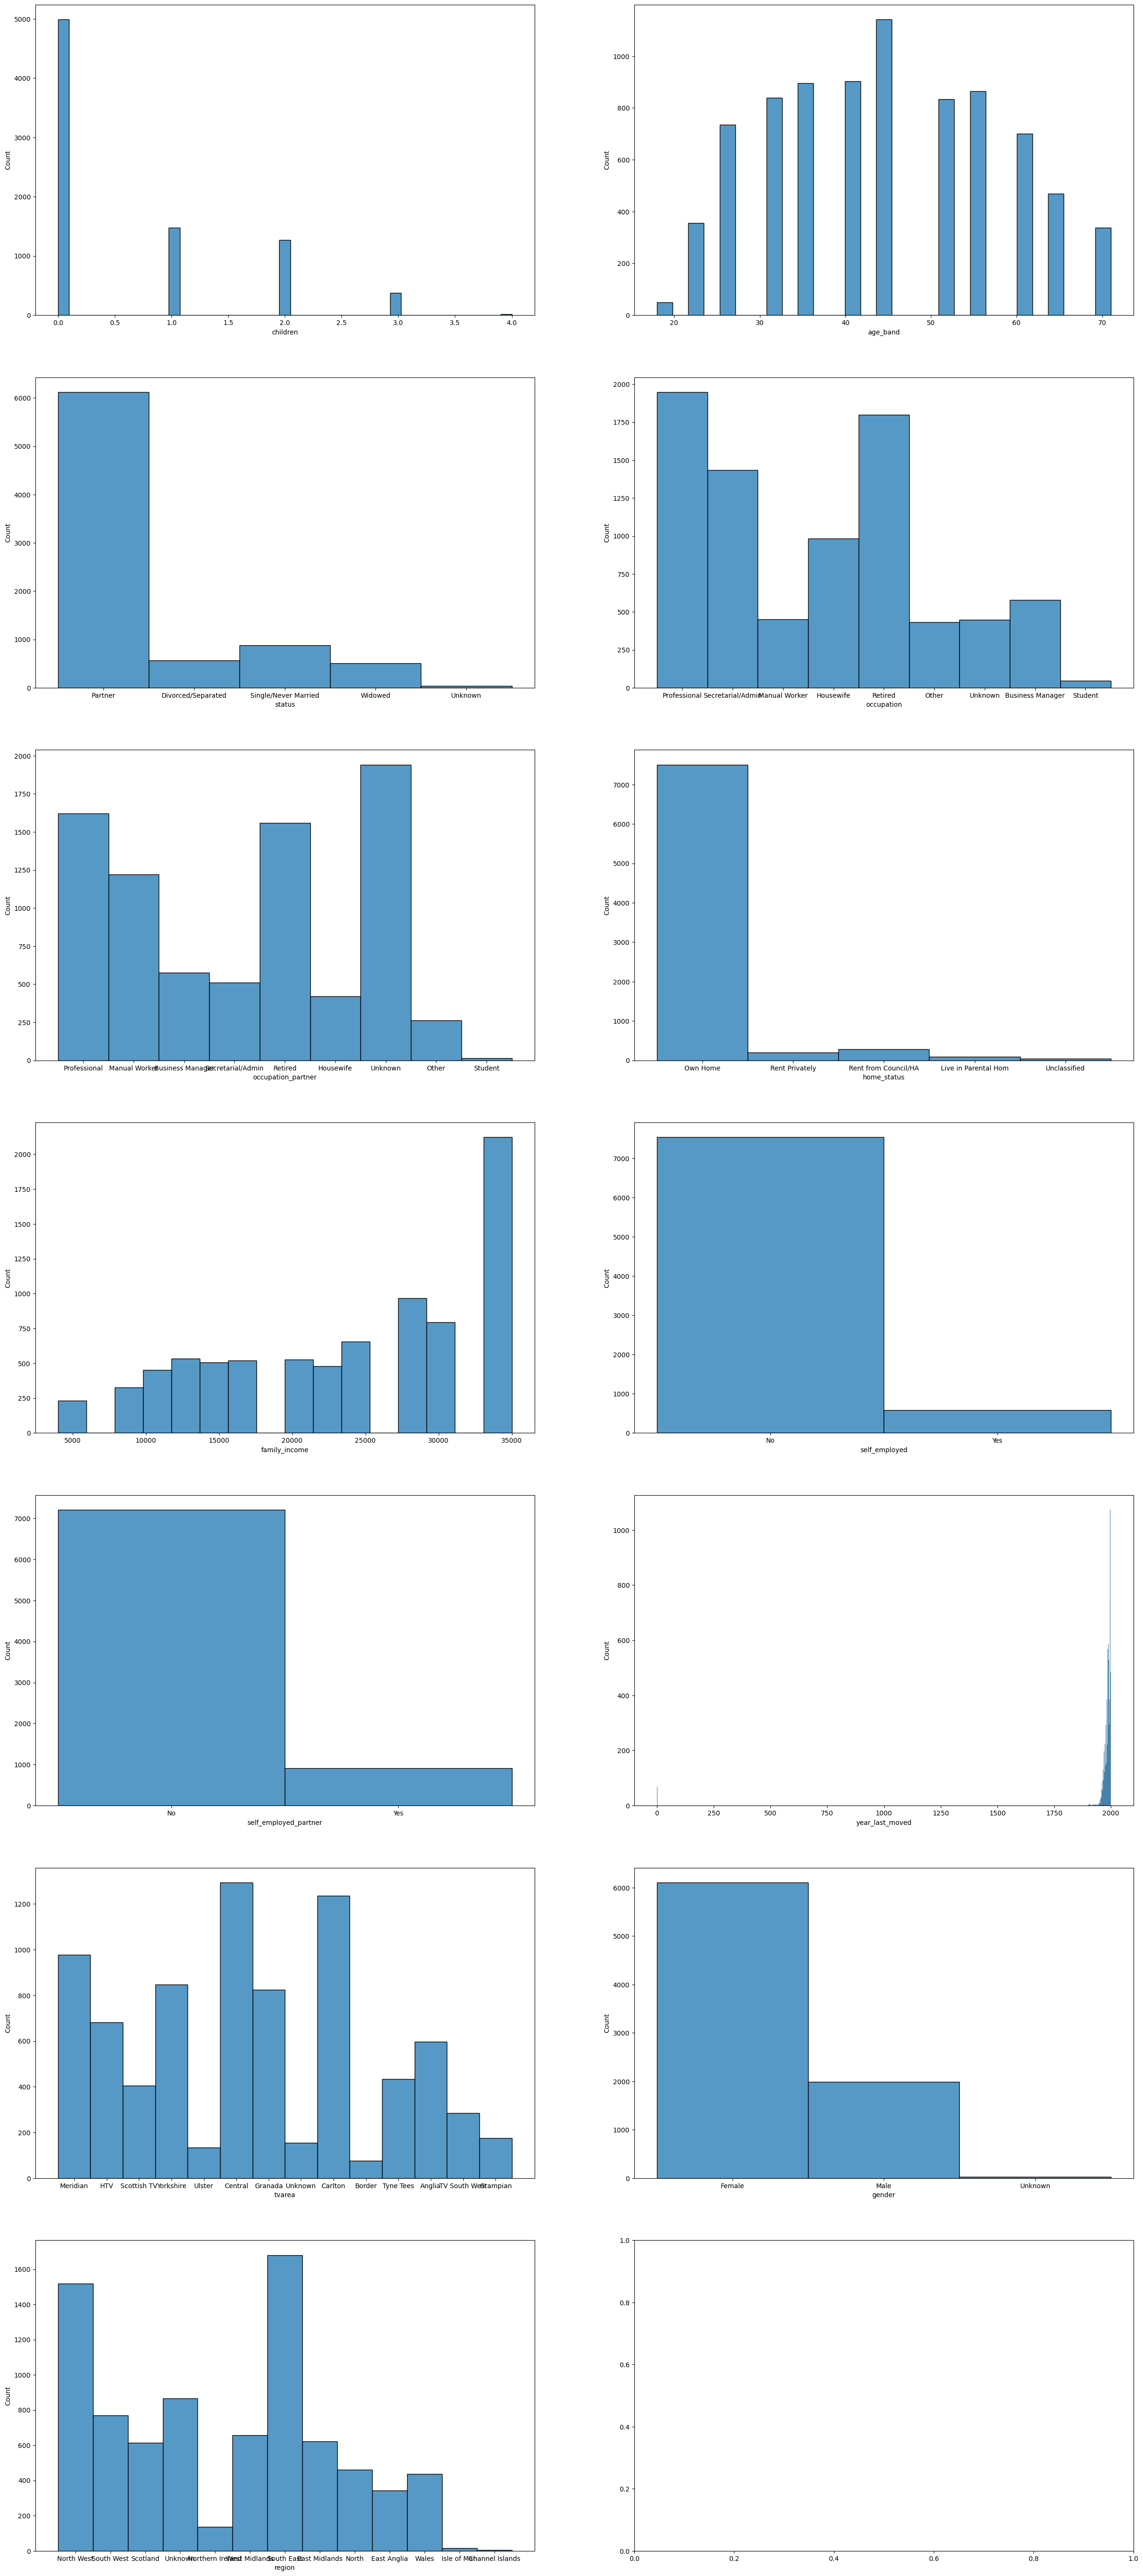

In [145]:
import math
import warnings
import matplotlib.pyplot as plt 
import seaborn as sns 

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
selected_columns = ['children', 'age_band', 'status', 'occupation', 'occupation_partner', 'home_status','family_income', 'self_employed', 'self_employed_partner','year_last_moved', 'tvarea', 'gender', 'region']
# Set up the number of rows and columns for subplots
num_rows = math.ceil(len(selected_columns)/2)  # Adjust as needed
num_cols = 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15 * num_cols, 10 * num_rows))

# Loop through each feature and create distribution plots
for i, col in enumerate(selected_columns):
    sns.histplot(train_data[col], kde=False, ax=axes[i//2, i%2])

<AxesSubplot:>

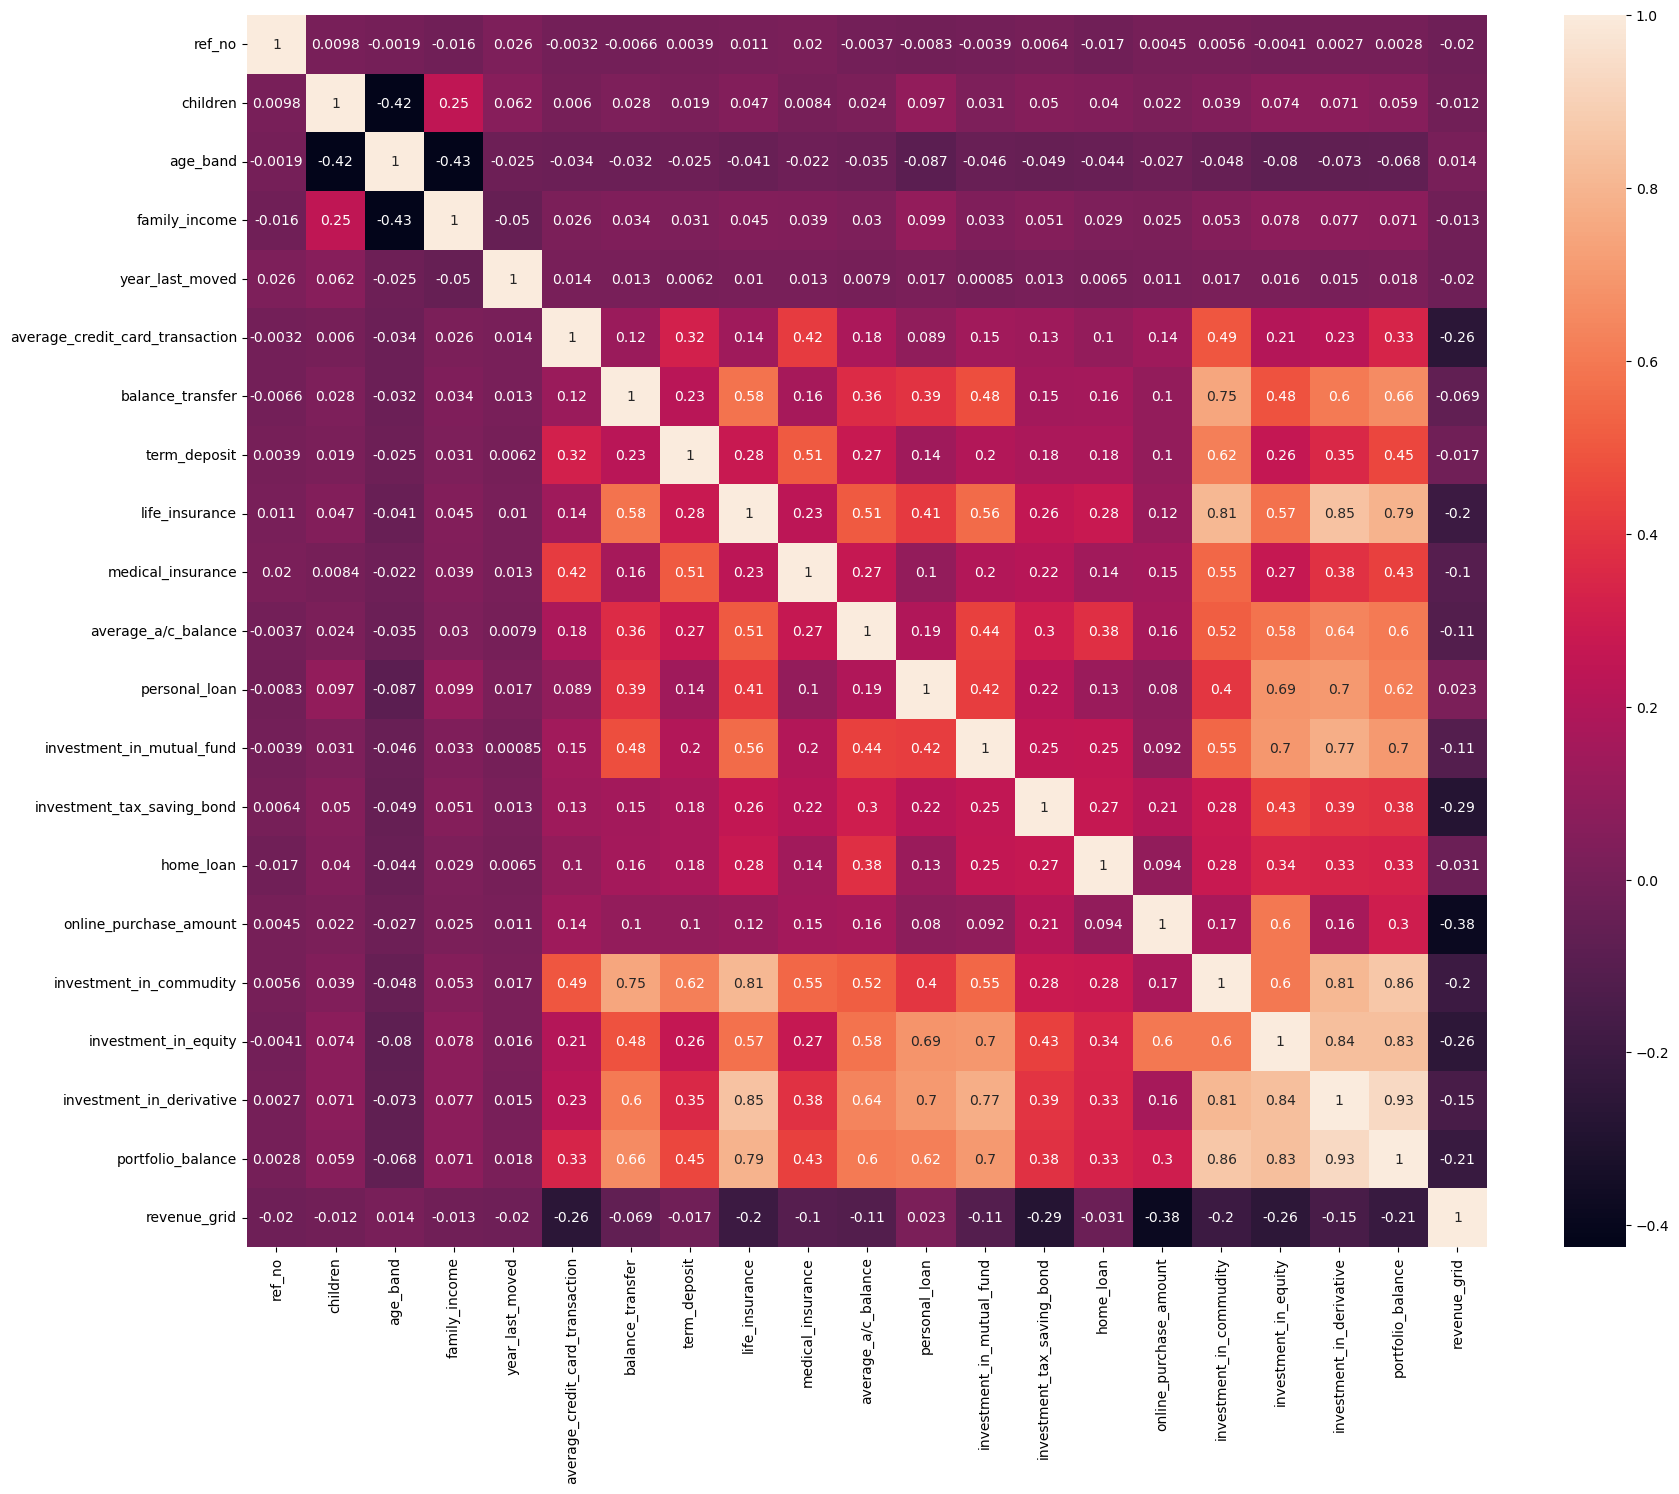

In [29]:
import matplotlib.pyplot as plt                                     
import seaborn as sns                                              
%matplotlib inline
plt.figure(figsize = [20, 16])
sns.heatmap(train_data.corr(), annot = True)

In [30]:
t_corr=train_data.corr().unstack().sort_values(ascending=False)
t_corr[t_corr != 1].head(15)

portfolio_balance         investment_in_derivative    0.927988
investment_in_derivative  portfolio_balance           0.927988
investment_in_commudity   portfolio_balance           0.862778
portfolio_balance         investment_in_commudity     0.862778
investment_in_derivative  life_insurance              0.845890
life_insurance            investment_in_derivative    0.845890
investment_in_derivative  investment_in_equity        0.837044
investment_in_equity      investment_in_derivative    0.837044
                          portfolio_balance           0.833036
portfolio_balance         investment_in_equity        0.833036
investment_in_commudity   investment_in_derivative    0.807580
investment_in_derivative  investment_in_commudity     0.807580
life_insurance            investment_in_commudity     0.806732
investment_in_commudity   life_insurance              0.806732
life_insurance            portfolio_balance           0.792836
dtype: float64

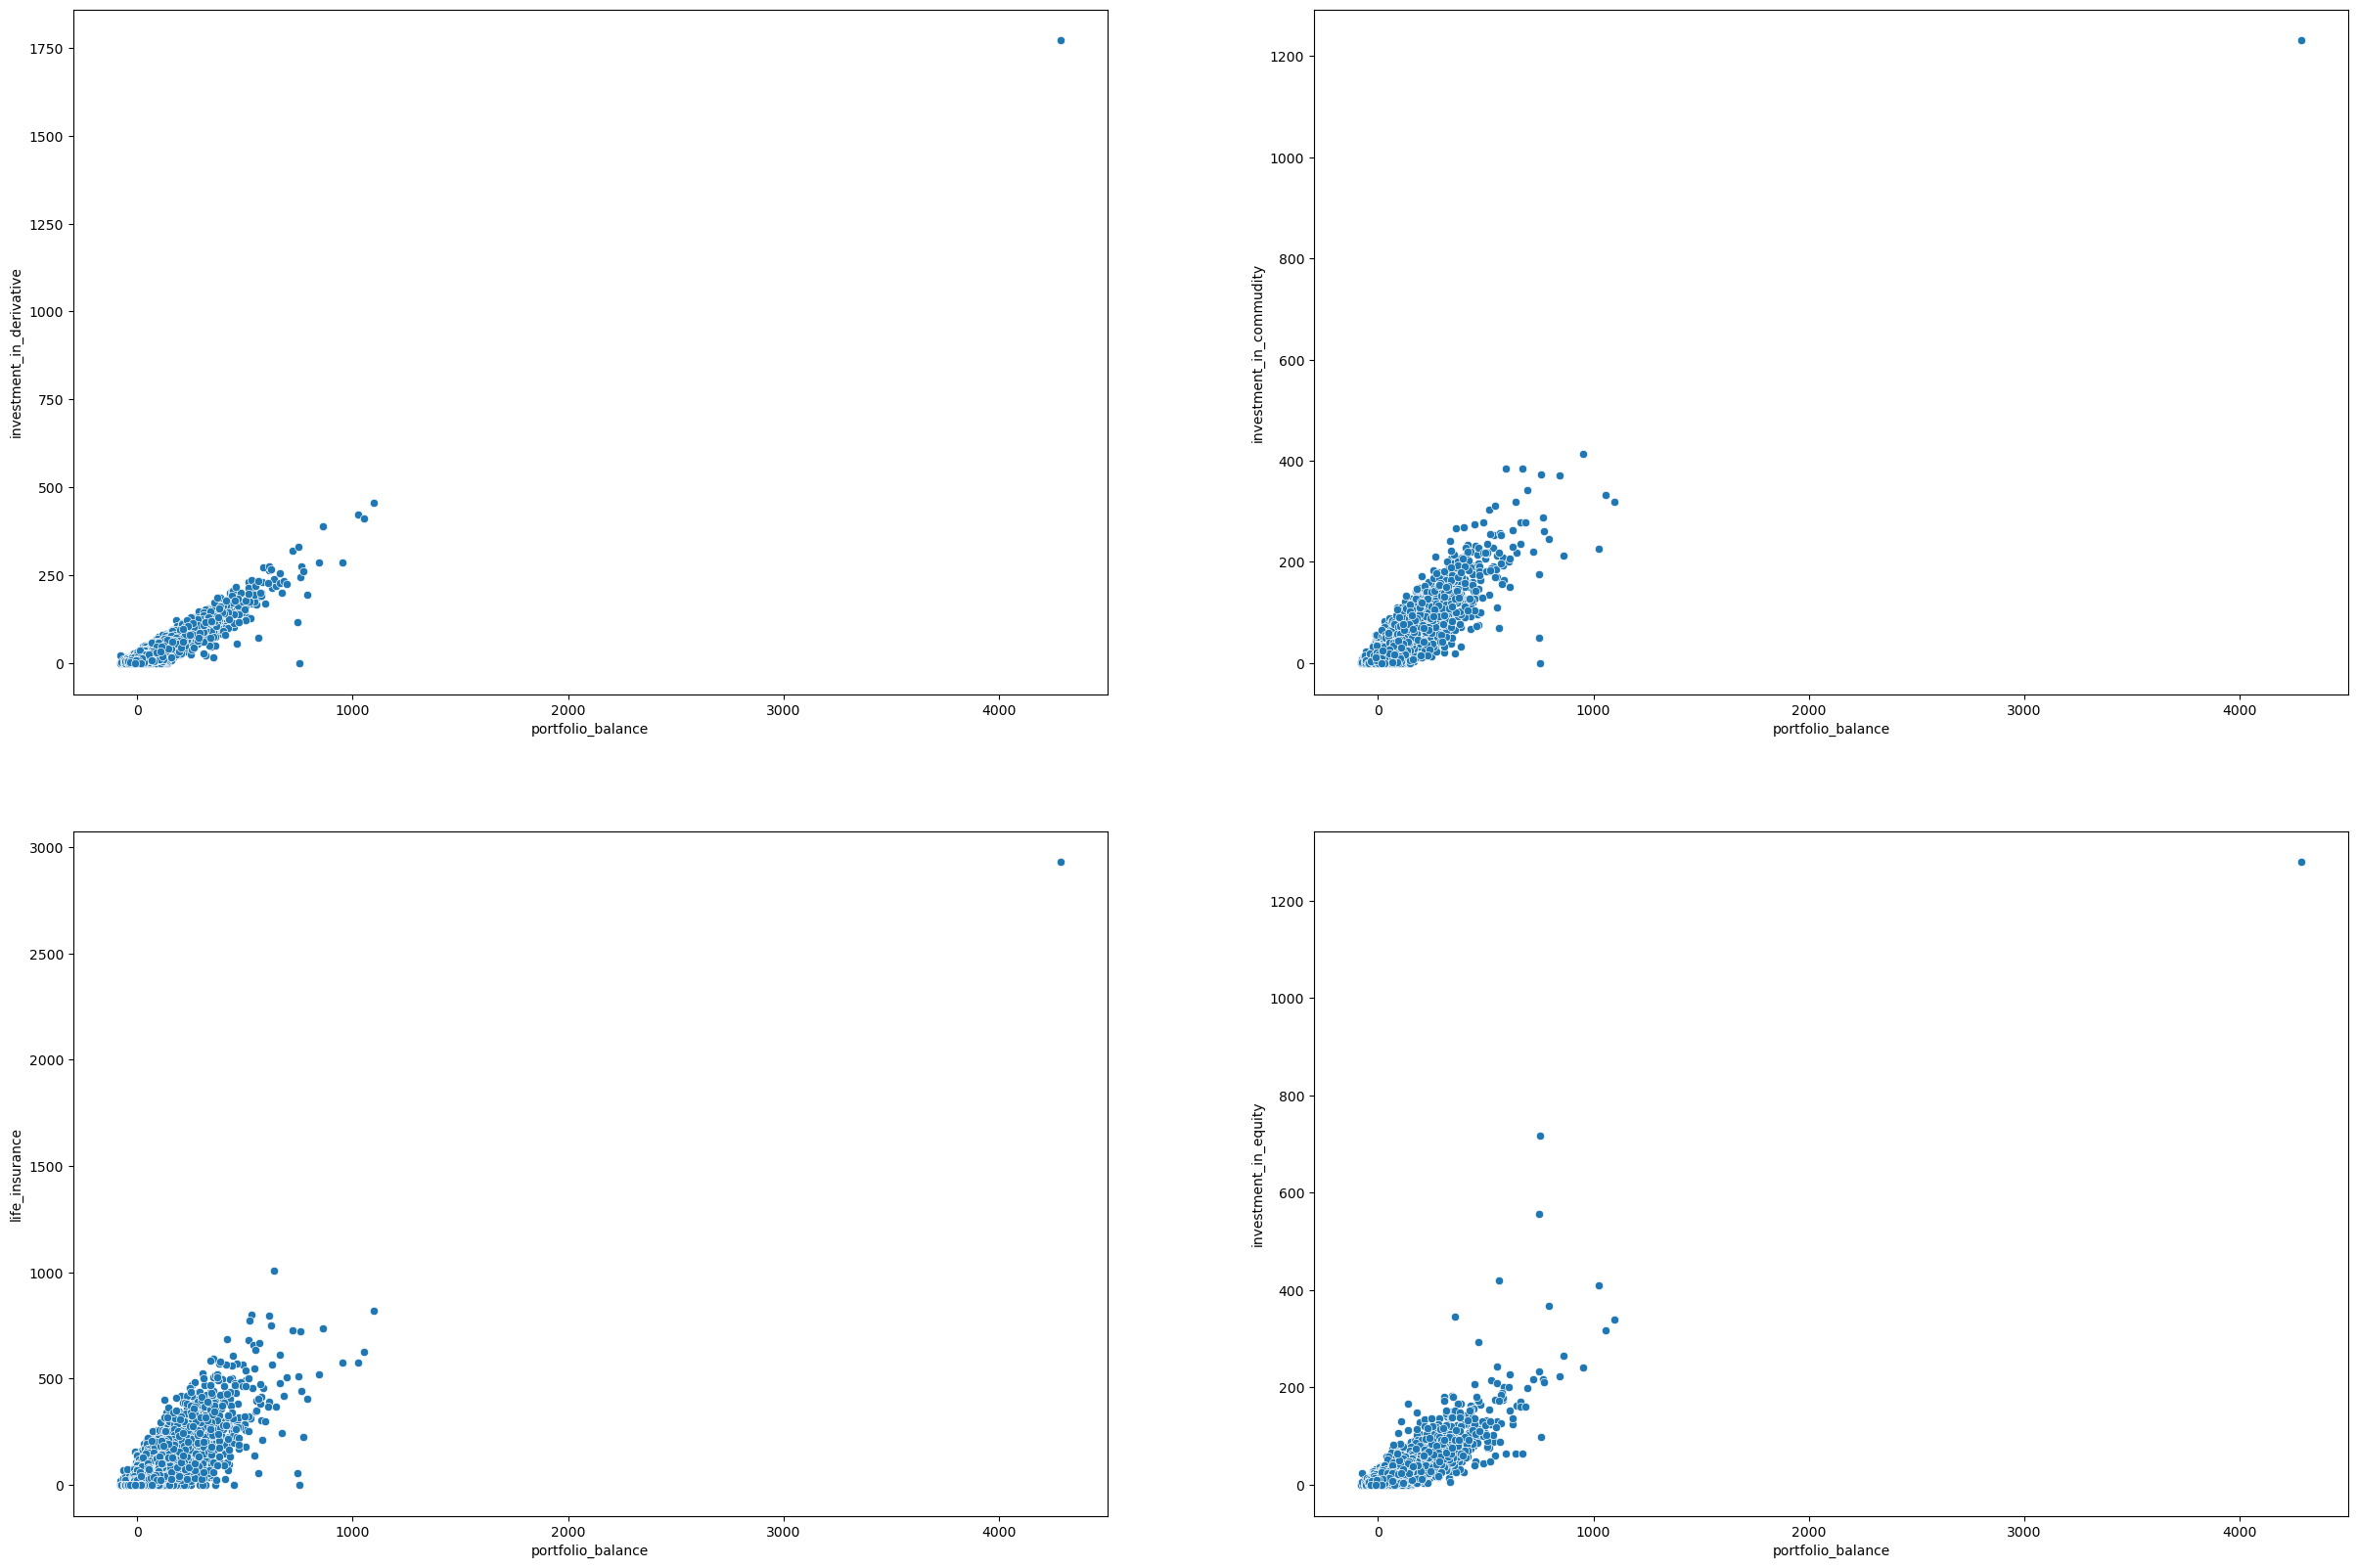

In [31]:
import math
import warnings
import seaborn as sns
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Set up the number of rows and columns for subplots
num_rows = 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15 * num_cols, 10 * num_rows))
# Loop through each feature and create distribution plots
for i, col in enumerate(['investment_in_derivative','investment_in_commudity','life_insurance','investment_in_equity']):
    sns.scatterplot(train_data['portfolio_balance'],train_data[col], ax=axes[i//2, i%2])

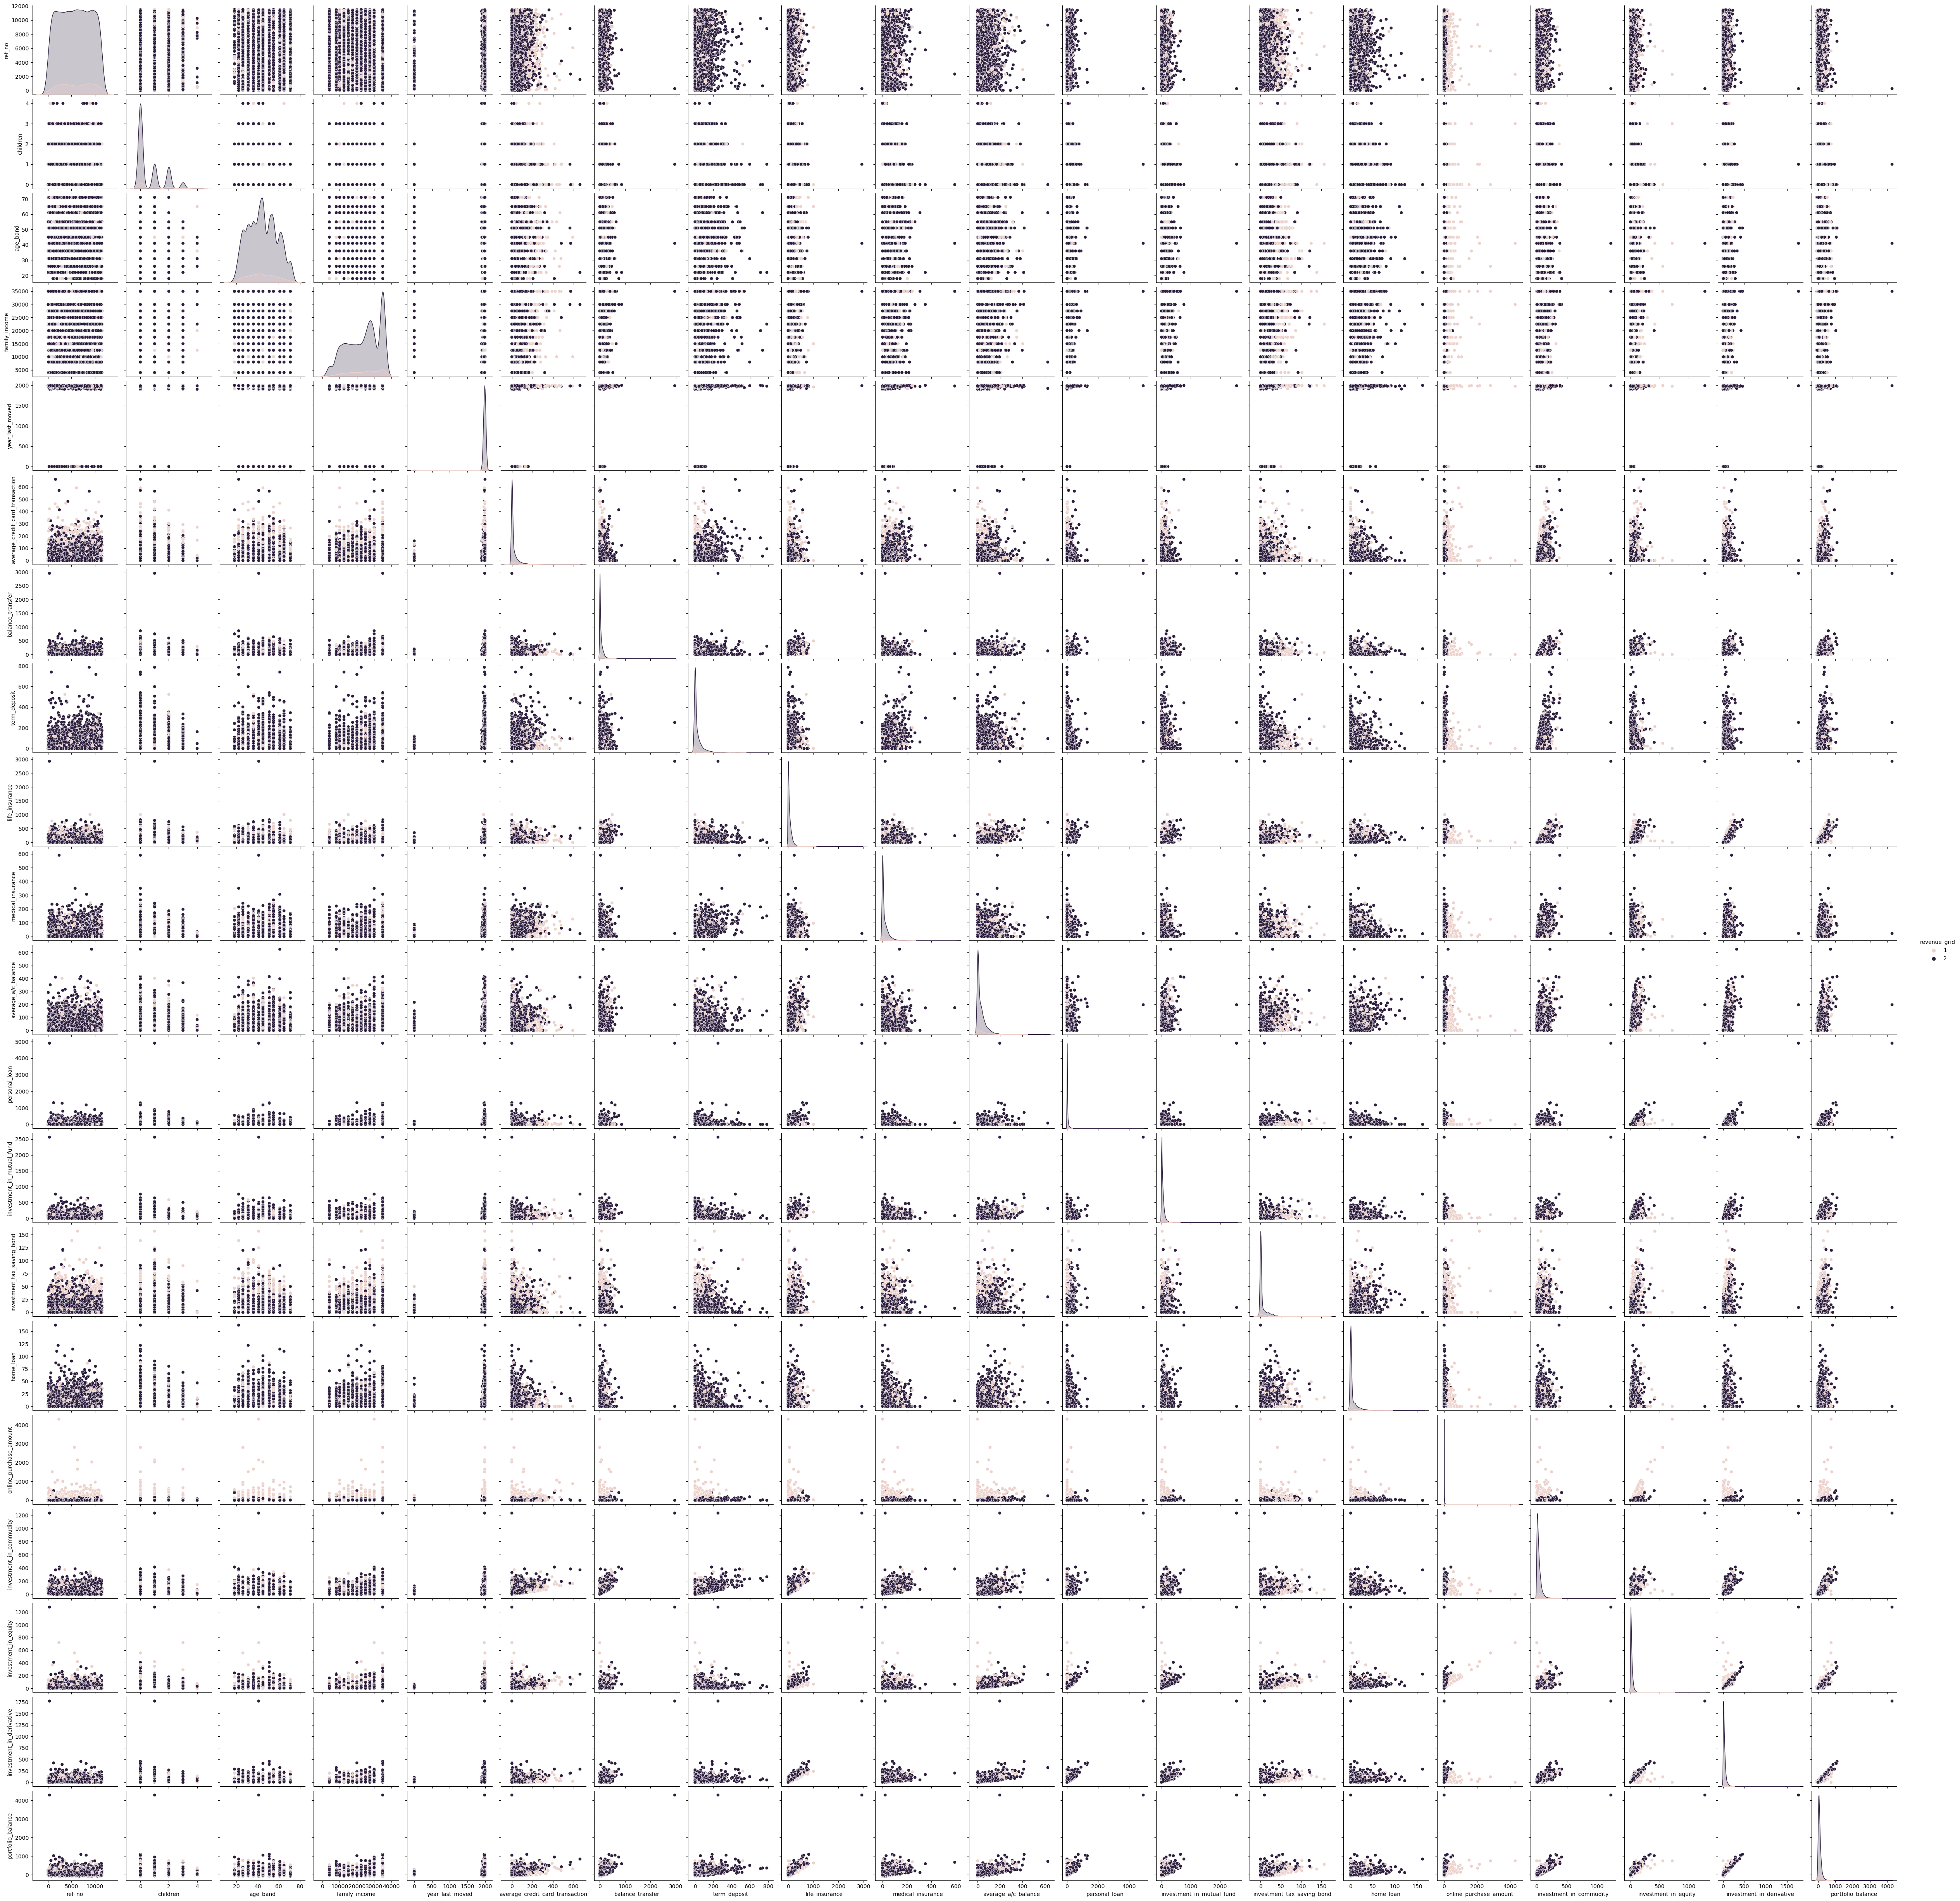

In [32]:
import seaborn as sns
sns.pairplot(train_data, diag_kind='kde',hue='revenue_grid')

In [16]:
# Split the data for x and y trains
x_train = train_data.drop(labels=['revenue_grid'], axis=1)
y_train = train_data['revenue_grid']
# x_test = test_data.drop(labels=['revenue_grid'], axis=1)
x_test = test_data
# y_test = test_data['revenue_grid']
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   children                         2031 non-null   int32  
 1   age_band                         2031 non-null   int32  
 2   status                           2031 non-null   object 
 3   occupation                       2031 non-null   object 
 4   occupation_partner               2031 non-null   object 
 5   home_status                      2031 non-null   object 
 6   family_income                    2031 non-null   int32  
 7   self_employed                    2031 non-null   object 
 8   self_employed_partner            2031 non-null   object 
 9   year_last_moved                  2031 non-null   int64  
 10  tvarea                           2031 non-null   object 
 11  post_area                        2031 non-null   object 
 12  average_credit_card_

In [17]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   children                         2031 non-null   int32  
 1   age_band                         2031 non-null   int32  
 2   status                           2031 non-null   object 
 3   occupation                       2031 non-null   object 
 4   occupation_partner               2031 non-null   object 
 5   home_status                      2031 non-null   object 
 6   family_income                    2031 non-null   int32  
 7   self_employed                    2031 non-null   object 
 8   self_employed_partner            2031 non-null   object 
 9   year_last_moved                  2031 non-null   int64  
 10  tvarea                           2031 non-null   object 
 11  post_area                        2031 non-null   object 
 12  average_credit_card_

In [18]:
from sklearn.preprocessing import LabelEncoder  
le= LabelEncoder()
selected_columns = ['status', 'occupation', 'occupation_partner', 'home_status',  'self_employed', 'self_employed_partner','tvarea', 'post_area', 'gender', 'region']
for i, col in enumerate(selected_columns):
    x_train[col]= le.fit_transform(x_train[col])
    x_test[col]= le.fit_transform(x_test[col])
    

In [19]:
x_train.select_dtypes('object').columns.tolist()
x_test.select_dtypes('object').columns.tolist()

[]

In [20]:
# Standardizing training set and testing set
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Overriding X_train and X_test variable with new values (scaled)
x_train_scaled = pd.DataFrame(data=x_train_scaled, 
                              columns=x_train.columns)
x_test_scaled = pd.DataFrame(data=x_test_scaled,
                             columns=x_test.columns)

In [150]:
x_train_scaled.head()
x_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   children                         8124 non-null   float64
 1   age_band                         8124 non-null   float64
 2   status                           8124 non-null   float64
 3   occupation                       8124 non-null   float64
 4   occupation_partner               8124 non-null   float64
 5   home_status                      8124 non-null   float64
 6   family_income                    8124 non-null   float64
 7   self_employed                    8124 non-null   float64
 8   self_employed_partner            8124 non-null   float64
 9   year_last_moved                  8124 non-null   float64
 10  tvarea                           8124 non-null   float64
 11  post_area                        8124 non-null   float64
 12  average_credit_card_

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(x_train_scaled, y_train)
# model.fit(x_train, y_train)

LogisticRegression()

In [22]:
y_train_predict=model.predict(x_train_scaled)
# y_train_predict=model.predict(x_train)
y_test_predict=model.predict(x_test_scaled)
# y_test_predict=model.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score,roc_auc_score, precision_recall_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay
def evaluate(y_t,y_p):
    accuracy= accuracy_score(y_t, y_p)
    lr_report = classification_report(y_t, y_p)
    print ('Accuracy =', accuracy*100,'%')
    print(lr_report)
    from sklearn.metrics import confusion_matrix
    #confusion matrix#
    mx=confusion_matrix(y_t, y_p)
    confusion_matrix = pd.DataFrame(mx)
    confusion_matrix.index = ['Actual 1 Grid','Actual 2 Grid']
    confusion_matrix.columns = ['Predicted 1 Grid','Predicted 2 Grid']
    print(confusion_matrix)

evaluate(y_train,y_train_predict)


Accuracy = 90.07877892663713 %
              precision    recall  f1-score   support

           1       0.66      0.13      0.22       860
           2       0.91      0.99      0.95      7264

    accuracy                           0.90      8124
   macro avg       0.78      0.56      0.58      8124
weighted avg       0.88      0.90      0.87      8124

               Predicted 1 Grid  Predicted 2 Grid
Actual 1 Grid               111               749
Actual 2 Grid                57              7207


In [166]:
y_train.value_counts()
y_check=pd.DataFrame(y_train_predict)
y_train.value_counts()

2    7264
1     860
Name: revenue_grid, dtype: int64

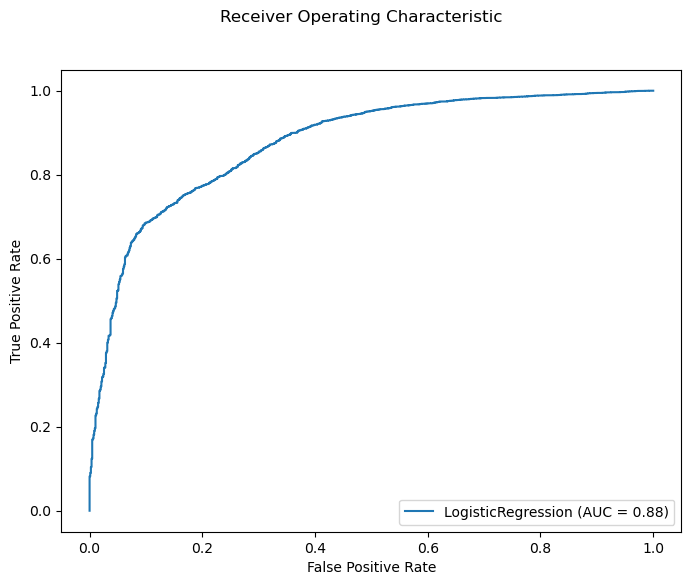

In [25]:
import sklearn.metrics as metrics
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt 

# Assuming you have already trained a logistic regression model (logreg) and have X_test and y_test data

# Create an instance of the plot_roc_curve function with your trained model
roc_disp = plot_roc_curve(model, x_train_scaled, y_train)

# Customize the plot if needed (e.g., setting title and labels)

roc_disp.figure_.set_size_inches(8, 6)
roc_disp.figure_.suptitle("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Show the ROC curve plot
plt.show()


In [ ]:
# y_train[y_train==1]=0
# y_train[y_train==2]=1
# y_train_predict[y_train_predict==1]=0
# y_train_predict[y_train_predict==2]=1
# y_train_predict.value_counts()
# import sklearn.metrics as metrics
# # calculate the fpr and tpr for all thresholds of the classification
# probs = model.predict_proba(x_train)
# preds = probs[:,1]
# fpr, tpr, threshold = metrics.roc_curve(y_train, y_train_predict)
# roc_auc = metrics.auc(fpr, tpr)


# import matplotlib.pyplot as plt
# plt.figure(figsize=(12,8))
# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# # plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

In [26]:
y_test_predict

array([2, 2, 2, ..., 2, 1, 2], dtype=int64)

In [27]:
test_data = pd.read_csv('C:/Users/A208818/Downloads/Customer-classification/existing_base_test.csv')
test_data['y_test_predict']=y_test_predict
test_data[['REF_NO', 'y_test_predict']].to_csv('CustClass_output.csv',header=False, index=False)